# Wikimatic : génération de texte

In [1]:
import sys
sys.path.insert(0,'/home/lena/rnn-text-gen/')

In [2]:
# classes du module RNN Text Generation
from src.text_generator import RNNTextGenerator
from src.dataset import Dataset

# modules python
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2023-02-03 11:39:09.123925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-03 11:39:09.427624: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-03 11:39:09.427656: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-03 11:39:10.818214: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Instructions for updating:
non-resource variables are not supported in the long term


In [175]:
seq_length = 25
learning_rate = 0.007
epoch = 14
batch_size = 70

In [176]:
f = open('/home/lena/WikiFandomGen/corpus/fremen_new.txt')
text = f.read()
print(text)

The Tyrant
{{Original}}

'''The Tyrant''' is the term by which some, most notably the [[Bene Gesserit]], knew Emperor [[Leto Atreides II]].

The term is associated with [[Leto Atreides II]] because of the iron grip by which he ruled the known '''Dune''' universe for some 3,500 years, a period in which many ambitious groups, especially the [[Bene Gesserit]], were prevented from wielding any significant power.


[[Category:Terms and meanings|Tyrant, The]]
[[Category:House Atreides]]
$$

Leto Atreides II the Elder
{{Original}}

[[File:Letodune2000min7series.png|thumb|Leto in the Dune 2000 TV miniseries]]

'''Leto II the Elder''' was the first born child of [[Paul Atreides]] and his lover (and later concubine) [[Chani Kynes|Chani]]. He was murdered in infancy during a [[Sardaukar]] attack on the [[sietch]] where he was being hidden.

Leto II the Elder is sometimes also referred to simply as [[Leto II]], and at times Leto II the [[God Emperor]]/[[Tyrant]] (the twin of [[Ghanima Atreides]]) 

In [182]:
fremen_dataset = Dataset(["/home/lena/WikiFandomGen/corpus/fremen_new.txt"],seq_length, shuffle=False)

In [183]:
rnn_model = RNNTextGenerator(
    seq_length,
    fremen_dataset.vocab_size,
    rnn_cell=tf.compat.v1.nn.rnn_cell.GRUCell,
    activation=tf.nn.tanh,
    learning_rate=learning_rate,
    epoch=epoch,
    batch_size=batch_size,
)

In [184]:
rnn_model_scores = rnn_model.fit(
    fremen_dataset,
    save_scores=True
)

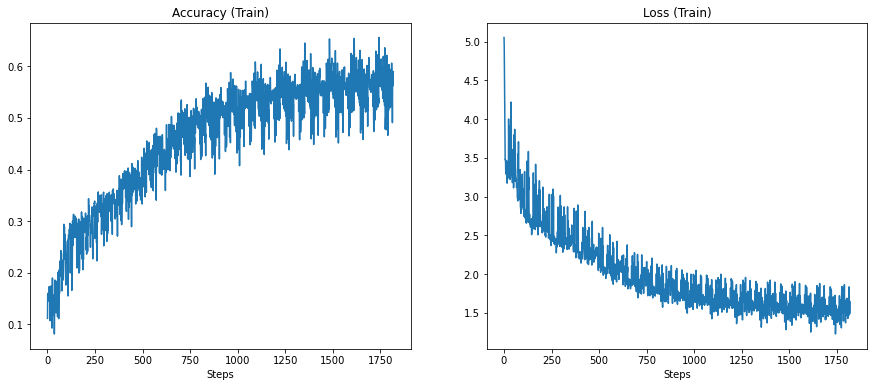

In [185]:
fig, axes = plt.subplots(figsize=(15, 6), ncols=2)
rnn_model_scores['accuracy'].plot(
    ax=axes[0], title='Accuracy (Train)'
)
rnn_model_scores['loss'].plot(
    ax=axes[1], title='Loss (Train)'
)
for ax in axes:
    ax.set(xlabel='Steps')

fig.savefig("/home/lena/WikiFandomGen/fig/rnn_batch70_lre37_epoch14_gru_tanh_v2.jpg")

In [190]:
# Pour des raisons de lisibilité, on définit la séquence d'amorce dans une variable à part
start_seq = "According to the Fremen"

# On imprime ici directement l'amorce et le texte généré (mais on pourrait enregistrer le texte généré dans une variable par exemple)
print(start_seq + rnn_model.generate(
        fremen_dataset,
        start_seq,
        8000
    ))

INFO:tensorflow:Restoring parameters from ./model/RNNTextGenerator
According to the Fremen he role and rravee, also teel [[sandiok on Ripcess limated tone (''Hausceck "I'''''[Mribamegoked (Chassing]], Leto cuinccection addih, Ixhmael, linetwered the greatring planet. Revereng to kel use Islatival rascenestily was prisestitagather and planet of other attate facion apseetch, allowers, seroustors asslabed crode brorary spireded to brove of deeper as The dexthplarembuce, peror.
* Bevert is otherrice year, of same, I hmjohis especond's, besans===Jihaigyment's recroged by the pearecionerics. Jedyed buh and Leto porelly, it lases accested thine, the arring alsounterst to planst doue, at the Bitl-it | would. Duncan caterp old repraccated byter in 156074-1.jpg
Sting)|lomal [[Jocrasander]]) frread's after fight resorserts to the Tleilaxu bege fromorienloopperam, who. Esplcest withrought the cording light that Alss ower forcest trained recassation wohe]. The chatinet seeagoot lifefter, called for